#Problem 1 Python:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
#reading the data
data = pd.read_csv("/content/adult_training.csv")

**Cleaning the data**

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

age               0
workclass         0
education         0
marital-status    0
occupation        0
sex               0
capital-gain      0
capital-loss      0
income            0
dtype: int64


>no missing values

**Contingency table for workclass vs sex**

In [ ]:
workclass_sex_table = pd.crosstab(data['workclass'], data['sex'])
print("Contingency Table of Workclass and Sex:")
print(workclass_sex_table)

Contingency Table of Workclass and Sex:
sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


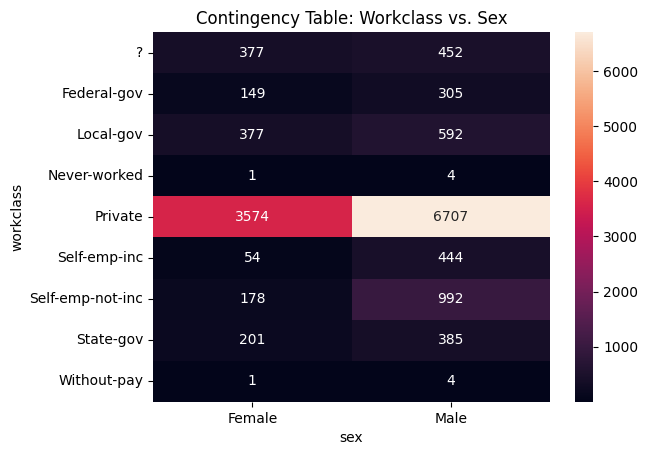

In [ ]:
#plotting
sns.heatmap(workclass_sex_table, annot=True, fmt="d")
plt.title("Contingency Table: Workclass vs. Sex")
plt.show()

**Contingency table for martial status and sex**

In [ ]:
sex_marital_table = pd.crosstab(data['marital-status'], data['sex'])
print("\nContingency Table of Sex and Marital Status:")
print(sex_marital_table)


Contingency Table of Sex and Marital Status:
sex                    Female  Male
marital-status                     
Divorced                 1219   795
Married-AF-spouse           7     4
Married-civ-spouse        761  6010
Married-spouse-absent      95   104
Never-married            2160  2717
Separated                 290   182
Widowed                   380    73


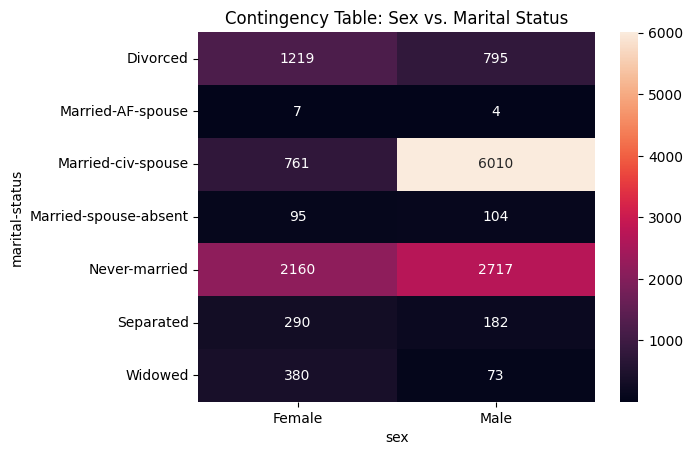

In [ ]:
#plotting
sns.heatmap(sex_marital_table, annot=True, fmt="d")
plt.title("Contingency Table: Sex vs. Marital Status")
plt.show()

**Adult over 40 data frame**

In [ ]:
adultOver40 = data[data['age'] > 40]

**Contingency table for adult over 40**

In [ ]:
sex_marital_table_over40 = pd.crosstab(adultOver40['marital-status'], adultOver40['sex'])
print("\nContingency Table of Sex and Marital Status for Adults Over 40:")
print(sex_marital_table_over40)


Contingency Table of Sex and Marital Status for Adults Over 40:
sex                    Female  Male
marital-status                     
Divorced                  720   448
Married-civ-spouse        305  3383
Married-spouse-absent      38    47
Never-married             256   315
Separated                 133    74
Widowed                   354    71


**Do outliers exist for education?**

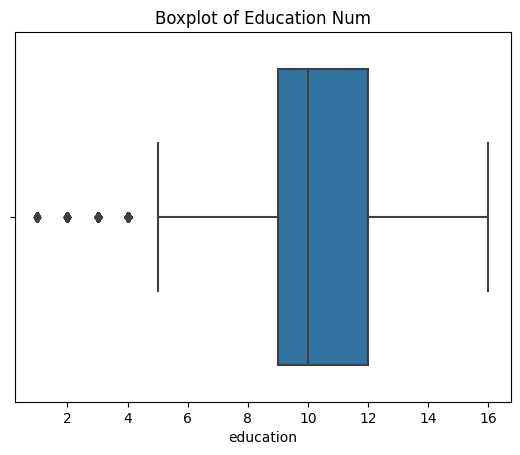

In [12]:
sns.boxplot(data=data, x='education')
plt.title("Boxplot of Education Num")
plt.show()

>As we can see, there are some outliers

In [11]:
#seeing the outliers
z_scores = stats.zscore(data['education'])
threshold = 3
outliers = data[(z_scores > threshold) | (z_scores < -threshold)]
print("Outliers in the 'education' column:")
print(outliers['education'])

Outliers in the 'education' column:
72       2
101      1
199      2
243      2
437      2
        ..
14254    2
14318    2
14475    2
14551    1
14724    2
Name: education, Length: 113, dtype: int64


>Going to leave the outliers, because it makes sense to only have 1 or 2 years of education

**Standardize Age**

In [ ]:
z_scores = (data['age'] - data['age'].mean()) / data['age'].std()
outliers = (z_scores > 3) | (z_scores < -3)
print("\nNumber of Age Outliers:", outliers.sum())
print("Most Extreme Outlier (z-score):", z_scores[outliers].max())


Number of Age Outliers: 60
Most Extreme Outlier (z-score): 3.7512269673123853


**Selecting records of age that are at least 80**

In [5]:
# Filter the dataset for people above the age of 80
filtered_df = data[data['age'] > 80]

# Create a contingency table for sex vs. workclass
table_workclass = pd.crosstab( filtered_df['workclass'], filtered_df['sex'])

# Create a contingency table for sex vs. education
table_education = pd.crosstab(filtered_df['education'], filtered_df['sex'])

# Create a contingency table for sex vs. marital status
table_marital_status = pd.crosstab(filtered_df['marital-status'], filtered_df['sex'])

# Print the contingency tables
print("Contingency Table for Sex vs. Workclass:")
print(table_workclass)

print("Contingency Table for Sex vs. Education:")
print(table_education)

print("Contingency Table for Sex vs. Marital Status:")
print(table_marital_status)

Contingency Table for Sex vs. Workclass:
sex               Female  Male
workclass                     
?                      3     8
Federal-gov            0     1
Local-gov              0     2
Private               10    16
Self-emp-inc           0     4
Self-emp-not-inc       1     5
Contingency Table for Sex vs. Education:
sex        Female  Male
education              
2               1     1
3               0     3
4               1     4
5               1     0
6               0     2
9               5    12
10              2     4
12              0     1
13              2     7
14              2     1
15              0     1
Contingency Table for Sex vs. Marital Status:
sex                 Female  Male
marital-status                  
Divorced                 2     1
Married-civ-spouse       1    19
Never-married            5     5
Separated                1     0
Widowed                  5    11


In [6]:
# Calculate row percentages
row_percentages = table_workclass.div(table_workclass.sum(axis=1), axis=0) * 100

# Calculate column percentages
column_percentages = table_workclass.div(table_workclass.sum(axis=0), axis=1) * 100

# Print row percentages
print("Workclass Row Percentages:")
print(row_percentages)

# Print column percentages
print("Workclass Column Percentages:")
print(column_percentages)

Workclass Row Percentages:
sex                  Female        Male
workclass                              
?                 27.272727   72.727273
Federal-gov        0.000000  100.000000
Local-gov          0.000000  100.000000
Private           38.461538   61.538462
Self-emp-inc       0.000000  100.000000
Self-emp-not-inc  16.666667   83.333333
Workclass Column Percentages:
sex                  Female       Male
workclass                             
?                 21.428571  22.222222
Federal-gov        0.000000   2.777778
Local-gov          0.000000   5.555556
Private           71.428571  44.444444
Self-emp-inc       0.000000  11.111111
Self-emp-not-inc   7.142857  13.888889


In [9]:
# Calculate row percentages
row_percentages = table_education.div(table_education.sum(axis=1), axis=0) * 100

# Calculate column percentages
column_percentages = table_education.div(table_education.sum(axis=0), axis=1) * 100

# Print row percentages
print("Education Row Percentages:")
print(row_percentages)

# Print column percentages
print("Education Column Percentages:")
print(column_percentages)

Education Row Percentages:
sex            Female        Male
education                        
2           50.000000   50.000000
3            0.000000  100.000000
4           20.000000   80.000000
5          100.000000    0.000000
6            0.000000  100.000000
9           29.411765   70.588235
10          33.333333   66.666667
12           0.000000  100.000000
13          22.222222   77.777778
14          66.666667   33.333333
15           0.000000  100.000000
Education Column Percentages:
sex           Female       Male
education                      
2           7.142857   2.777778
3           0.000000   8.333333
4           7.142857  11.111111
5           7.142857   0.000000
6           0.000000   5.555556
9          35.714286  33.333333
10         14.285714  11.111111
12          0.000000   2.777778
13         14.285714  19.444444
14         14.285714   2.777778
15          0.000000   2.777778


In [10]:
# Calculate row percentages
row_percentages = table_marital_status.div(table_marital_status.sum(axis=1), axis=0) * 100

# Calculate column percentages
column_percentages = table_marital_status.div(table_marital_status.sum(axis=0), axis=1) * 100

# Print row percentages
print("Row Percentages:")
print(row_percentages)

# Print column percentages
print("Column Percentages:")
print(column_percentages)

Row Percentages:
sex                     Female       Male
marital-status                           
Divorced             66.666667  33.333333
Married-civ-spouse    5.000000  95.000000
Never-married        50.000000  50.000000
Separated           100.000000   0.000000
Widowed              31.250000  68.750000
Column Percentages:
sex                    Female       Male
marital-status                          
Divorced            14.285714   2.777778
Married-civ-spouse   7.142857  52.777778
Never-married       35.714286  13.888889
Separated            7.142857   0.000000
Widowed             35.714286  30.555556


>This is the analysis for people over 80. We are looking at males and females and comparing workclass, education, marital status. We can see the row percentages(what males and females make up which category) and the column percentage(out of the categories what gender is it mainly compromised of)

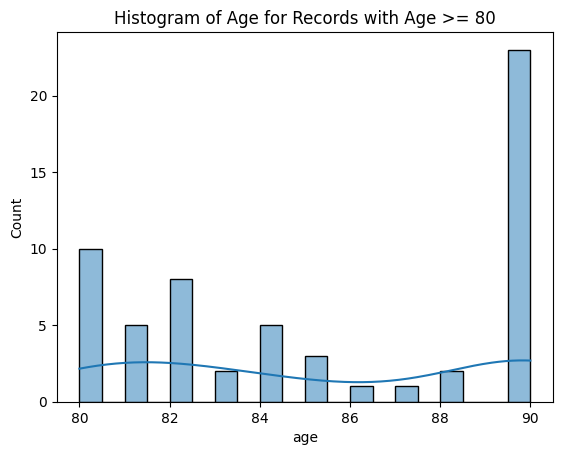

In [ ]:
age_anomalies = data[data['age'] >= 80]
sns.histplot(data=age_anomalies, x='age', bins=20, kde=True)
plt.title("Histogram of Age for Records with Age >= 80")
plt.show()

>We can see that a lot of people who are above 80 are between 88 and 90

**Summary:**

>As you can see we made contingency tables for workclass and sex as well as marital status and sex. We then created a new data frame for adults over 40 and recreated the contingency table for sex vs marital status for only people above the age of 40. We determined the outliers for the education field. We also determined the outliers for the age field and saw the most extreme outlier. We looked at people above the age of 80 as well.